<p>feature engineering and <i>polynomial regression</i></p>

In [318]:
import numpy as np
import matplotlib.pyplot as plt

<p>linear regression model</p>

In [319]:
def layer_size(X_train, Y_train):
    in_layer = X_train.shape[0]
    out_layer = Y_train.shape[0]
    return in_layer, out_layer

def init_param(in_layer, out_layer):
    W = np.random.randn(out_layer, in_layer) * 0.01
    b = np.zeros((out_layer, 1))
    
    params = {
        "W": W,
        "b": b
    }
    
    return params

def forward_propagation(X_train, W, b):
    y_hat = np.dot(W, X_train) + b
    return y_hat

def compute_cost(Y_train, y_hat):
    cost = np.mean(np.power(y_hat - Y_train, 2)) / 2
    return cost

def back_propagation(X_train, Y_train, y_hat):
    m = X_train.shape[1]
    dz = y_hat - Y_train
    dw = np.dot(dz, X_train.T) / m
    db = np.sum(dz, axis=1, keepdims=True) / m
    grads = {
        "dW": dw,
        "db": db
    }
    
    return grads

def train(X_train, Y_train, alpha, n):

    in_layer, out_layer = layer_size(X_train, Y_train)
    params = init_param(in_layer, out_layer)
    cost_ = []
    
    for i in range(n):
        y_hat = forward_propagation(X_train, params["W"], params["b"])
        cost = compute_cost(Y_train, y_hat)
        grads = back_propagation(X_train, Y_train, y_hat)
        
        params["W"] -= grads["dW"] * alpha
        params["b"] -= grads["db"] * alpha
        cost_.append(cost)
        
        if i == 1:
            print(f"Iteration 1: {cost}")
        
        elif i % 100 == 0 and i != 0:
            print(f"Iteration {i}: {cost}")
        
    
    return params, cost_

def predict(X, params):
    y_hat = np.dot(params["W"], X) + params["b"]
    return y_hat.flatten()

In [320]:
x = np.arange(1, 200)
y = x**2 + np.random.uniform(low=-100, high=10000, size=len(x))
x1 = (x  - np.mean(x)) / np.std(x)
y1 = (y - np.mean(y)) / np.std(y)
print(x1.shape)
print(y1.shape)
print(x1[:50])
print(y1[:20])

(199,)
(199,)
[-1.72336879 -1.70596103 -1.68855326 -1.6711455  -1.65373773 -1.63632997
 -1.6189222  -1.60151443 -1.58410667 -1.5666989  -1.54929114 -1.53188337
 -1.51447561 -1.49706784 -1.47966008 -1.46225231 -1.44484454 -1.42743678
 -1.41002901 -1.39262125 -1.37521348 -1.35780572 -1.34039795 -1.32299019
 -1.30558242 -1.28817465 -1.27076689 -1.25335912 -1.23595136 -1.21854359
 -1.20113583 -1.18372806 -1.16632029 -1.14891253 -1.13150476 -1.114097
 -1.09668923 -1.07928147 -1.0618737  -1.04446594 -1.02705817 -1.0096504
 -0.99224264 -0.97483487 -0.95742711 -0.94001934 -0.92261158 -0.90520381
 -0.88779605 -0.87038828]
[-0.81788809 -0.88734954 -0.97538898 -1.262757   -1.02839894 -0.89248152
 -1.21871095 -0.84035667 -0.83003925 -0.79112727 -0.78619513 -1.33356223
 -0.83324305 -0.82905114 -1.49583745 -1.04952989 -1.55756042 -1.12694373
 -0.72642486 -1.29552097]


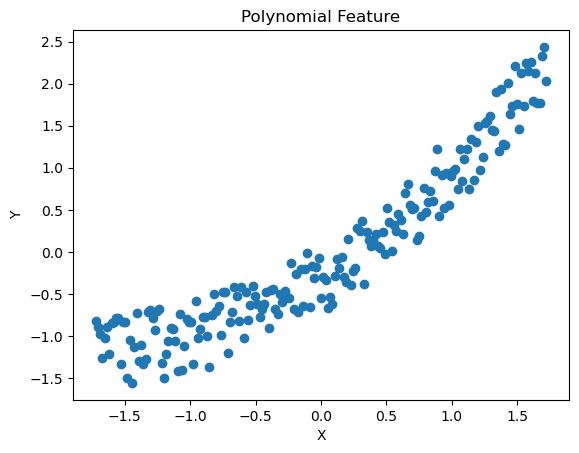

In [321]:
plt.scatter(x1, y1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Feature")
plt.show()

In [322]:
params_, cost_ = train(x1.reshape((1, 199)), y1.reshape((1, 199)), 0.004, 1000)
params_1, cost_1 = train(x1.reshape((1, 199)), y1.reshape((1, 199)), 0.001, 10000)
params_2, cost_2 = train(x1.reshape((1, 199)), y1.reshape((1, 199)), 0.01, 1000)
params_3, cost_3 = train(x1.reshape((1, 199)), y1.reshape((1, 199)), 0.0001, 100000)

Iteration 1: 0.4925932130653032
Iteration 100: 0.25849254169904584
Iteration 200: 0.15192994741411234
Iteration 300: 0.10412504129263941
Iteration 400: 0.08267934484898608
Iteration 500: 0.07305861900162923
Iteration 600: 0.06874267775564606
Iteration 700: 0.06680650899516767
Iteration 800: 0.06593792685852681
Iteration 900: 0.06554827336163581
Iteration 1: 0.5018735249960783
Iteration 100: 0.4234039251480596
Iteration 200: 0.3584488919123791
Iteration 300: 0.3052735299852435
Iteration 400: 0.26174158218649096
Iteration 500: 0.2261042040761173
Iteration 600: 0.19692970620037215
Iteration 700: 0.1730460376637665
Iteration 800: 0.15349370037261867
Iteration 900: 0.1374872023356488
Iteration 1000: 0.12438350145363167
Iteration 1100: 0.11365617206473012
Iteration 1200: 0.10487425641707399
Iteration 1300: 0.0976849514515402
Iteration 1400: 0.09179943535674095
Iteration 1500: 0.08698126449485606
Iteration 1600: 0.08303687455854583
Iteration 1700: 0.07980780435417803
Iteration 1800: 0.0771643

In [323]:
print(params_)
print(params_1)
print(params_2)
print(params_3)

{'W': array([[0.91562472]]), 'b': array([[-5.55356989e-17]])}
{'W': array([[0.93244769]]), 'b': array([[-5.55161723e-17]])}
{'W': array([[0.93245036]]), 'b': array([[-5.55502043e-17]])}
{'W': array([[0.93244735]]), 'b': array([[-5.55124344e-17]])}


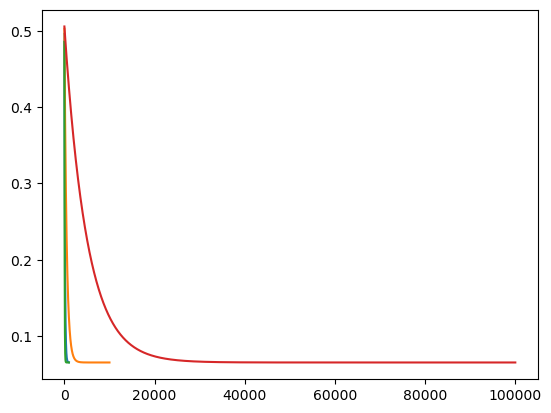

In [324]:
plt.plot(cost_)
plt.plot(cost_1)
plt.plot(cost_2)
plt.plot(cost_3)

plt.show()

In [325]:
x = np.arange(0, 20, 1)
y = 1 + x**2
print(x.shape)
print(y.shape)
print(x)
print(y)

(20,)
(20,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


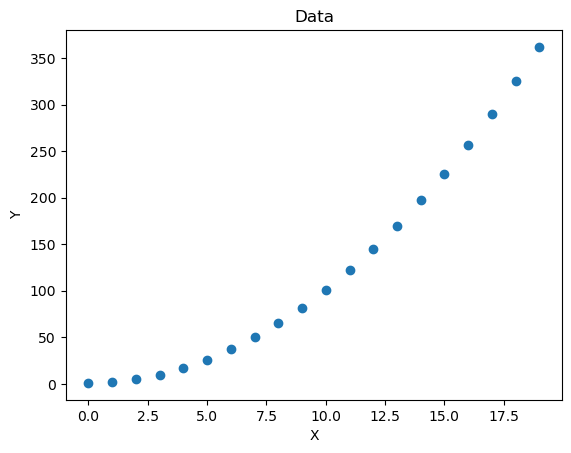

In [326]:
plt.scatter(x, y)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [327]:
params, cost = train(x.reshape((1, 20)), y.reshape((1, 20)), 0.01, 1000)
print(params)

Iteration 1: 1658.3672489949845
Iteration 100: 695.9282261744687
Iteration 200: 589.2823449680453
Iteration 300: 526.8858605985846
Iteration 400: 490.37885988158024
Iteration 500: 469.01930549611563
Iteration 600: 456.5222349456682
Iteration 700: 449.21043576089016
Iteration 800: 444.932440601728
Iteration 900: 442.4294666934851
{'W': array([[18.69806651]]), 'b': array([[-52.08337103]])}


In [328]:
y_hat = predict(x.reshape((1, 20)), {'W': 18.69806593, 'b':-52.08336348})

In [329]:
print(y_hat)

[-52.08336348 -33.38529755 -14.68723162   4.01083431  22.70890024
  41.40696617  60.1050321   78.80309803  97.50116396 116.19922989
 134.89729582 153.59536175 172.29342768 190.99149361 209.68955954
 228.38762547 247.0856914  265.78375733 284.48182326 303.17988919]


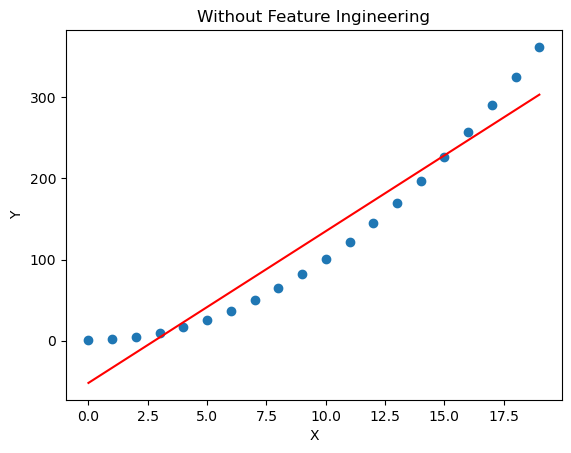

In [330]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("Without Feature Ingineering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<p>Engineer features</p>

In [331]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x**2 

In [332]:
params, cost = train(X.reshape((1, 20)), y.reshape((1, 20)), 1e-5, 10000)
print(params)

Iteration 1: 7076.923335065129
Iteration 100: 0.22674178211481358
Iteration 200: 0.22653424970041983
Iteration 300: 0.22632690723647242
Iteration 400: 0.22611975454911412
Iteration 500: 0.22591279146464655
Iteration 600: 0.22570601780953004
Iteration 700: 0.225499433410384
Iteration 800: 0.22529303809398815
Iteration 900: 0.2250868316872711
Iteration 1000: 0.22488081401733545
Iteration 1100: 0.22467498491142934
Iteration 1200: 0.22446934419696865
Iteration 1300: 0.22426389170151154
Iteration 1400: 0.22405862725279824
Iteration 1500: 0.22385355067870463
Iteration 1600: 0.223648661807275
Iteration 1700: 0.22344396046671094
Iteration 1800: 0.22323944648536642
Iteration 1900: 0.22303511969174977
Iteration 2000: 0.2228309799145444
Iteration 2100: 0.22262702698256706
Iteration 2200: 0.22242326072481
Iteration 2300: 0.22221968097040629
Iteration 2400: 0.2220162875486599
Iteration 2500: 0.22181308028901378
Iteration 2600: 0.2216100590210898
Iteration 2700: 0.2214072235746471
Iteration 2800: 0.

In [333]:
y_hat = predict(X.reshape((1, 20)), {'W': 1.00417508, 'b':0.04893269})
print(y_hat)

[4.89326900e-02 1.05310777e+00 4.06563301e+00 9.08650841e+00
 1.61157340e+01 2.51533097e+01 3.61992356e+01 4.92535116e+01
 6.43161378e+01 8.13871142e+01 1.00466441e+02 1.21554117e+02
 1.44650144e+02 1.69754521e+02 1.96867248e+02 2.25988326e+02
 2.57117753e+02 2.90255531e+02 3.25401659e+02 3.62556137e+02]


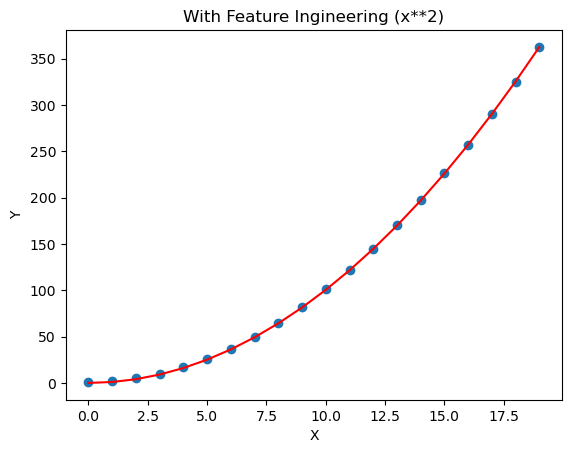

In [334]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("With Feature Ingineering (x**2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [335]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3] 
print(y)
print(X)
print(X.shape)
print(y.shape)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]
(20, 3)
(20,)


In [336]:
params, cost = train(X.reshape((3, 20)), y.reshape((1, 20)), 1e-7, 10000)
print(params)

Iteration 1: 9075.899359836152
Iteration 100: 3957.09045271384
Iteration 200: 3889.287261892246
Iteration 300: 3827.839961677107
Iteration 400: 3767.650431326502
Iteration 500: 3708.6878212690217
Iteration 600: 3650.9271158554534
Iteration 700: 3594.3438148272216
Iteration 800: 3538.913917357564
Iteration 900: 3484.61391186513
Iteration 1000: 3431.42076604094
Iteration 1100: 3379.3119170786536
Iteration 1200: 3328.2652621039733
Iteration 1300: 3278.2591487991535
Iteration 1400: 3229.2723662186218
Iteration 1500: 3181.2841357918137
Iteration 1600: 3134.274102509416
Iteration 1700: 3088.222326289276
Iteration 1800: 3043.1092735182997
Iteration 1900: 2998.915808766787
Iteration 2000: 2955.6231866716416
Iteration 2100: 2913.2130439850575
Iteration 2200: 2871.667391785274
Iteration 2300: 2830.9686078461255
Iteration 2400: 2791.09942916212
Iteration 2500: 2752.0429446258986
Iteration 2600: 2713.782587854967
Iteration 2700: 2676.302130164626
Iteration 2800: 2639.585673684188
Iteration 2900: 2

In [337]:
y_hat = predict(X.reshape((3, 20)), 
                {'W': np.array([[1.60010337, 0.15167673, 0.03093508]]), 'b':0.00397114})
print(y_hat)


[ 37.99417334  69.03007901   7.86922203  59.69246858  87.70334787
  11.77541143  87.82305664 112.17537019  25.58557451 123.2959979
 142.63175645  58.90033149 167.02135274 179.25811713 121.32030259
 219.90918154 222.24006271 222.44610803 282.86954468 271.76320367]


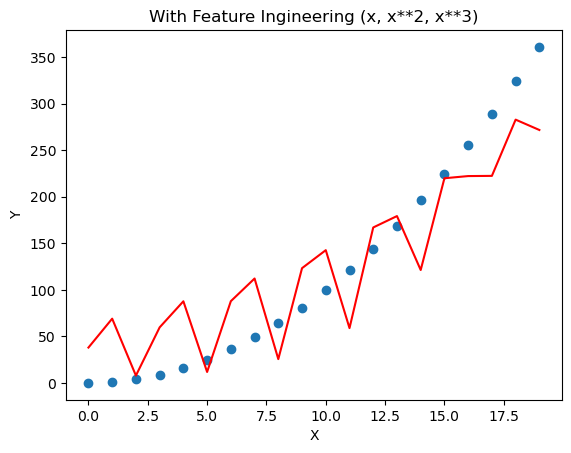

In [341]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("With Feature Ingineering (x, x**2, x**3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [342]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]  
X_features = ['x','x^2','x^3']

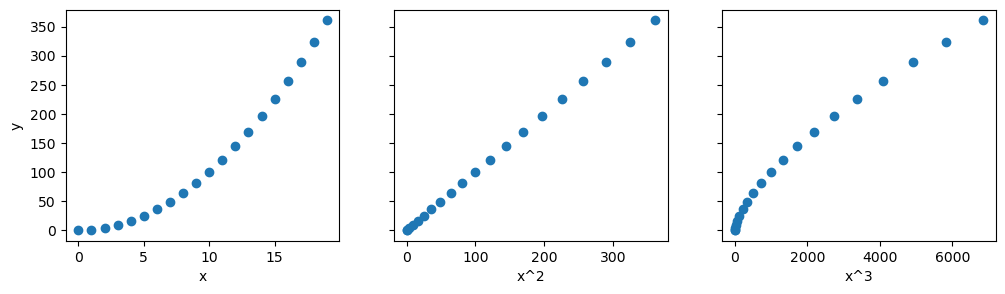

In [343]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [344]:
x = np.arange(0,20,1)
y = x**2
X = np.c_[x, x**2, x**3]

X = (X - np.mean(X)) / np.std(X)
print(X)

[[-0.44231709 -0.44231709 -0.44231709]
 [-0.44163239 -0.44163239 -0.44163239]
 [-0.44094769 -0.43957829 -0.43683948]
 [-0.44026299 -0.43615478 -0.42383015]
 [-0.43957829 -0.43136187 -0.3984962 ]
 [-0.43889358 -0.42519956 -0.35672942]
 [-0.43820888 -0.41766784 -0.29442159]
 [-0.43752418 -0.40876672 -0.20746452]
 [-0.43683948 -0.3984962  -0.09174998]
 [-0.43615478 -0.38685628  0.05683021]
 [-0.43547008 -0.37384695  0.24238429]
 [-0.43478538 -0.35946822  0.46902044]
 [-0.43410067 -0.34372009  0.74084689]
 [-0.43341597 -0.32660256  1.06197184]
 [-0.43273127 -0.30811562  1.43650349]
 [-0.43204657 -0.28825928  1.86855006]
 [-0.43136187 -0.26703354  2.36221976]
 [-0.43067717 -0.24443839  2.92162078]
 [-0.42999247 -0.22047384  3.55086135]
 [-0.42930776 -0.19513989  4.25404967]]


In [359]:
params, cost = train(X.reshape((3, 20)), y.reshape((1, 20)), 1e-1, 10000)
print(params)

Iteration 1: 10794.465730311487
Iteration 100: 4256.870378358233
Iteration 200: 3951.321977544228
Iteration 300: 3883.94808570885
Iteration 400: 3855.8124715988642
Iteration 500: 3834.2333028752655
Iteration 600: 3813.84091501675
Iteration 700: 3793.752473422094
Iteration 800: 3773.8222416034064
Iteration 900: 3754.025577635524
Iteration 1000: 3734.357737460849
Iteration 1100: 3714.8172503322517
Iteration 1200: 3695.4031877124626
Iteration 1300: 3676.1147145816817
Iteration 1400: 3656.9510156979427
Iteration 1500: 3637.911283454654
Iteration 1600: 3618.994715857468
Iteration 1700: 3600.2005161637326
Iteration 1800: 3581.5278927952554
Iteration 1900: 3562.976059296138
Iteration 2000: 3544.5442342982087
Iteration 2100: 3526.231641487877
Iteration 2200: 3508.0375095733884
Iteration 2300: 3489.961072252344
Iteration 2400: 3472.001568179413
Iteration 2500: 3454.1582409342773
Iteration 2600: 3436.430338989764
Iteration 2700: 3418.8171156801945
Iteration 2800: 3401.3178291699405
Iteration 290

In [360]:
y_hat = predict(X.reshape((3, 20)), 
                {'W': np.array([[1080.80326704,  210.24264257,   45.28902728]]), 'b':605.48587079})
print(y_hat)

[ 50.73662799  83.53754542  21.88993942  70.59599615 101.38370065
  24.82027778  96.56342718 123.31470544  32.47868791 129.50264164
 149.51661656  49.30533475 170.27736009 180.17549076  79.74038322
 219.75130309 215.4773848  128.22399824 278.78819122 255.60835543]


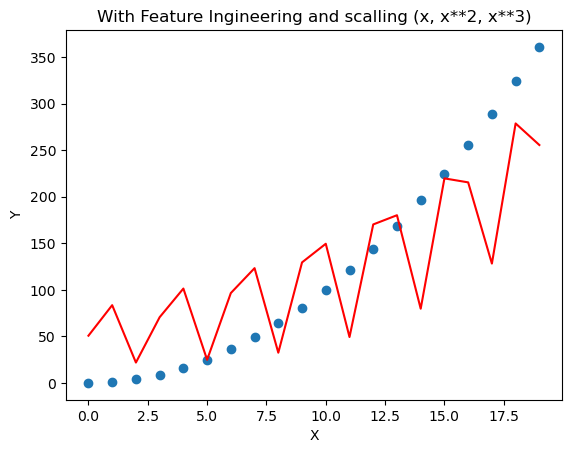

In [361]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("With Feature Ingineering and scalling (x, x**2, x**3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [365]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
print(X.shape)
X = (X - np.mean(X)) / np.std(X) 

(20, 13)


In [367]:
params, cost = train(X.reshape((13, 20)), y.reshape((1, 20)), 1e-1, 1000000)
print(params)

Iteration 1: 0.212560699813861
Iteration 100: 0.15981295967918255
Iteration 200: 0.15291073902903932
Iteration 300: 0.14788024032992558
Iteration 400: 0.14413164562388198
Iteration 500: 0.14126796281080806
Iteration 600: 0.13902136387791628
Iteration 700: 0.13721070126661444
Iteration 800: 0.13571302990120154
Iteration 900: 0.13444451536012375
Iteration 1000: 0.13334763249385748
Iteration 1100: 0.13238257994709224
Iteration 1200: 0.13152152034629722
Iteration 1300: 0.13074471448517816
Iteration 1400: 0.13003792514310347
Iteration 1500: 0.12939067210491678
Iteration 1600: 0.1287950579536773
Iteration 1700: 0.1282449766890986
Iteration 1800: 0.12773557920019601
Iteration 1900: 0.12726291115377114
Iteration 2000: 0.12682366669425535
Iteration 2100: 0.1264150200040271
Iteration 2200: 0.12603450927486295
Iteration 2300: 0.12567995601999576
Iteration 2400: 0.12534940827223592
Iteration 2500: 0.12504109997807358
Iteration 2600: 0.12475342142131782
Iteration 2700: 0.12448489720189353
Iteration

In [369]:
y_hat = predict(X.reshape((13, 20)), 
                {'W': np.array([[-0.04020063,  -0.05128368,  -0.03314692,  -0.03769871,
         -0.02368219,  -0.1117068 ,  -0.9870724 ,  20.66537196,
        -18.09164323,   3.50693596,  -1.34084508,   0.35180832,
         -0.07831584]]), 'b':0.40500202})
print(y_hat)

[ 5.54947921e-01  3.58302094e-01  6.39468804e-02 -5.58823986e-03
 -7.45276287e-03 -4.01797061e-02 -6.16284227e-01 -9.36341191e-01
 -6.55850544e-01 -6.29775364e-03 -5.20673865e-03 -1.06301867e-03
  6.83398423e-02  1.23391574e+00  9.51427948e-01  2.34188858e-01
 -5.68859127e-03 -9.09536880e-03 -7.24656744e-02 -1.24957099e+00]


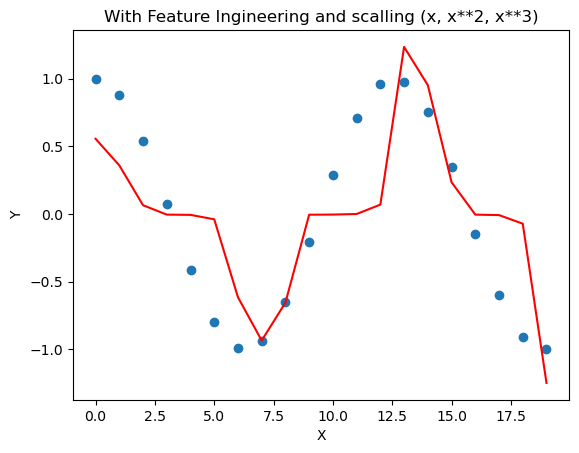

In [370]:
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.title("With Feature Ingineering and scalling (x, x**2, x**3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()